# Machine Learning pour le cabinet d'expertise comptable

Dataset : 35582 lignes pour 19 colonnes

## <span style="color:red">Problématique : Peut-on prédire le coût d'une mission pour le cabinet ?</span>

Objectifs : 
- Eviter les malis en donnant la bonne facturation (total HT) au client par mission
- Améliorer le chiffre d'affaires


Type de machine learning :
- Apprentissage supervisé avec cible continue (Regression)

Métriques d'évaluation :
- Coefficient de détermination - Rsquared (mesure de la part de variance expliquée par le R²)
- MAE

## <span style="color:red">Modèles : </span>

- Régression linéaire

### 1/ IMPORT et PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
import sklearn
import skopt
print(skopt.__version__)

0.8.1


In [3]:
df = pd.read_csv("./Data/dataset-ML.csv")

In [4]:
df.valorisation_temps.mean()

1656.7456993509395

In [5]:
df.describe()

,exercice,total_assistant,temps,valorisation_temps,facturation,entrée_clt,sortie_clt,ags,cac,cap,...,scf,sci,scm,scp,sdf,selarl,selas,sem,sep,snc
count,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,...,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000
mean,2018.582582,3.544642,45.219825,1656.745699,1595.180793,0.089874,0.077397,0.000225,0.006098,0.000028,...,0.000225,0.160976,0.010061,0.002276,0.000225,0.012478,0.000450,0.000056,0.000731,0.005902
std,1.114378,2.079425,570.992930,2666.712615,3496.031262,0.286006,0.267223,0.014993,0.077855,0.005301,...,0.014993,0.367514,0.099800,0.047658,0.014993,0.111007,0.021201,0.007497,0.027022,0.076597
min,2017.000000,1.000000,0.000000,-1.500000,-600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,2.000000,3.500000,261.500000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,3.000000,10.000000,736.500000,670.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.000000,5.000000,33.250000,2036.200000,1905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,25.000000,36328.500000,91573.750000,383660.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modifier l'index par le code de chaque mission

In [6]:
df.set_index('code_mission', inplace=True)

In [7]:
df.dtypes

type_mission        object
exercice             int64
code_client         object
total_assistant    float64
manager             object
                    ...   
selarl               int64
selas                int64
sem                  int64
sep                  int64
snc                  int64
Length: 196, dtype: object

In [8]:
df.columns[166:]

Index(['coop', 'divers', 'earl', 'eirl', 'eurl', 'gaec', 'gfa', 'gfo', 'gfr',
       'gie', 'ind', 'indiv', 'particulier', 'sa', 'sadir', 'sarl', 'sas',
       'sasu', 'sc', 'scea', 'scf', 'sci', 'scm', 'scp', 'sdf', 'selarl',
       'selas', 'sem', 'sep', 'snc'],
      dtype='object')

Sélectionner les features pour éviter le fléau de la dimension

### Supprimer les colonnes redondantes ou inutiles à la prédiction :

In [9]:
df.drop(['type_mission','manager','code_client','code_article','libelle_article','site','entrée_clt','sortie_clt','secteur','forme'], axis=1, inplace=True)

### Convertir exercice en format pd.datetime

In [10]:
df['exercice'] = pd.to_datetime(df['exercice'], format='%Y')

In [11]:
df.describe()

,total_assistant,temps,valorisation_temps,facturation,ags,cac,cap,cat,com,ge0,...,scf,sci,scm,scp,sdf,selarl,selas,sem,sep,snc
count,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,...,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000,35583.000000
mean,3.544642,45.219825,1656.745699,1595.180793,0.000225,0.006098,0.000028,0.000084,0.409437,0.023691,...,0.000225,0.160976,0.010061,0.002276,0.000225,0.012478,0.000450,0.000056,0.000731,0.005902
std,2.079425,570.992930,2666.712615,3496.031262,0.014993,0.077855,0.005301,0.009182,0.491737,0.152087,...,0.014993,0.367514,0.099800,0.047658,0.014993,0.111007,0.021201,0.007497,0.027022,0.076597
min,1.000000,0.000000,-1.500000,-600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.500000,261.500000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,10.000000,736.500000,670.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,33.250000,2036.200000,1905.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,36328.500000,91573.750000,383660.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Supprimer cette facturation négative qui n'apportera rien au ML

In [12]:
df.drop('ACOM2019012853400', axis=0, inplace=True)

In [13]:
df.columns[:14]

Index(['exercice', 'total_assistant', 'temps', 'valorisation_temps',
       'facturation', 'ags', 'cac', 'cap', 'cat', 'com', 'ge0', 'ge1', 'ge2',
       'ge3'],
      dtype='object')

### Ne conserver que les activités, les formes juridiques et types de mission ci-après (qui ont corrélation supérieure à 0.2 ou inférieure -0.2)
Sans retenir les activités qui ont une corrélation de plus de 90 % avec le type de mission comptabilité notamment:
'controle et revision'
'comptes annuels et declarations fiscales'
'saisie et centralisation'

In [14]:
df = df.loc[:,['exercice', 'total_assistant', 'temps', 'valorisation_temps','com','jur','Formalités de rupture de contrat de travail','autres declarations fiscales',
               'Formalités embauche','renseignements client','declarations tva','presentation des comptes annuels','travaux exceptionnels covd','Autres travaux exceptionnels',
               'situation intermediaire','Secrétariat juridique','sas', 'sci']]

### Vérifier qu'il n'y a pas de valeurs manquantes

In [15]:
df.isna().sum()

exercice                                       0
total_assistant                                0
temps                                          0
valorisation_temps                             0
com                                            0
jur                                            0
Formalités de rupture de contrat de travail    0
autres declarations fiscales                   0
Formalités embauche                            0
renseignements client                          0
declarations tva                               0
presentation des comptes annuels               0
travaux exceptionnels covd                     0
Autres travaux exceptionnels                   0
situation intermediaire                        0
Secrétariat juridique                          0
sas                                            0
sci                                            0
dtype: int64

### Supprimer les lignes où le coût "valorisation_temps" est à 0 ou négatif

In [16]:
list_index_val0 = df[df.valorisation_temps <= 0].index

In [17]:
df.drop(list_index_val0, axis=0, inplace=True)

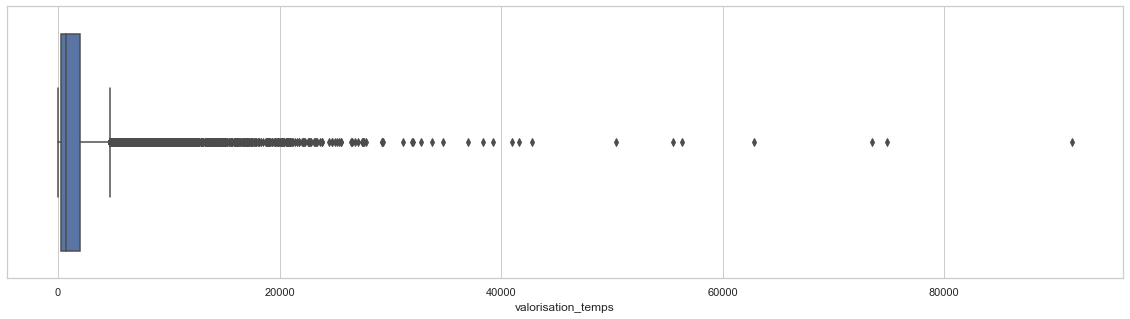

In [18]:
fig=plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df.valorisation_temps)

In [19]:
df_sansoutliers = df[df.valorisation_temps < 7000]

In [20]:
len(df_sansoutliers)

34280

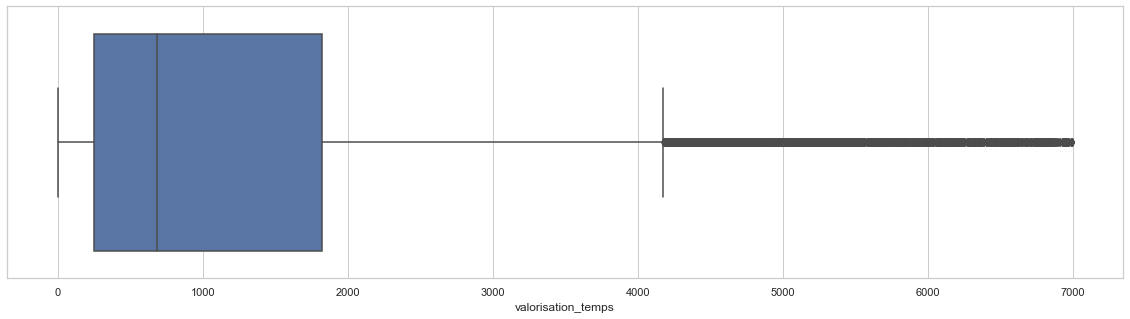

In [21]:
#Sans 1295 données considérées comme outliers au delà de 5000 €
fig=plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_sansoutliers.valorisation_temps)

In [22]:
"""df_sansoutliers['valorisation_temps'] = df_sansoutliers.valorisation_temps.apply(lambda x: np.log(x+10))"""

"df_sansoutliers['valorisation_temps'] = df_sansoutliers.valorisation_temps.apply(lambda x: np.log(x+10))"

<AxesSubplot:>

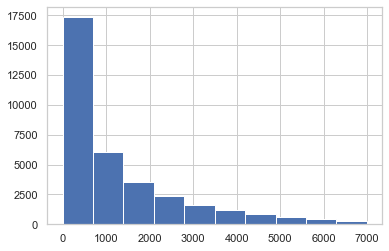

In [23]:
df_sansoutliers.valorisation_temps.hist()

In [24]:
df.columns

Index(['exercice', 'total_assistant', 'temps', 'valorisation_temps', 'com',
       'jur', 'Formalités de rupture de contrat de travail',
       'autres declarations fiscales', 'Formalités embauche',
       'renseignements client', 'declarations tva',
       'presentation des comptes annuels', 'travaux exceptionnels covd',
       'Autres travaux exceptionnels', 'situation intermediaire',
       'Secrétariat juridique', 'sas', 'sci'],
      dtype='object')

### Définir une fonction pour évaluer les performances de chaque modèle

In [25]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### 2/ Validation croisée sur la performance des différents modèles

### Modèle régression linéaire

In [32]:
mccm_data_train = df_sansoutliers[['total_assistant', 'temps', 'com', 'jur', 'Formalités de rupture de contrat de travail', 'autres declarations fiscales', 'Formalités embauche', 
                     'renseignements client', 'declarations tva','presentation des comptes annuels', 'travaux exceptionnels covd',
                     'Autres travaux exceptionnels', 'situation intermediaire','Secrétariat juridique', 'sas', 'sci']]

mccm_target_train = df_sansoutliers['valorisation_temps']

mccm_data_train, mccm_data_test, mccm_target_train, mccm_target_test = train_test_split(mccm_data_train, mccm_target_train, test_size=20)

In [27]:
mccm_data_train

,total_assistant,temps,com,jur,Formalités de rupture de contrat de travail,autres declarations fiscales,Formalités embauche,renseignements client,declarations tva,presentation des comptes annuels,travaux exceptionnels covd,Autres travaux exceptionnels,situation intermediaire,Secrétariat juridique,sas,sci
code_mission,,,,,,,,,,,,,,,,
ACOM2018010023800,7.0,27.00,1,0,0,0,0,1,1,0,0,0,0,1,0,0
AGEJ2020013216100,3.0,19.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0
AGS12020013628300,2.0,4.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0
AJUR2020011882600,1.0,2.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0
AJUR2018010711000,6.0,6.25,0,1,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGJ02020013511400,2.0,5.50,0,0,0,0,0,0,0,0,0,0,0,1,0,0
ACOM2020011195500,5.0,16.75,1,0,0,0,0,0,0,1,0,1,0,0,0,1
ACOM2020012109100,3.0,29.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [28]:
mccm_target_train

code_mission
ACOM2018010023800    1875.50
AGEJ2020013216100    1454.01
AGS12020013628300     310.51
AJUR2020011882600     132.00
AJUR2018010711000     970.50
                      ...   
AGJ02020013511400     385.50
ACOM2020011195500    1324.76
ACOM2020012109100    2489.66
ASAP2020013377300     159.75
AGES2017010577400    1083.25
Name: valorisation_temps, Length: 34260, dtype: float64

In [29]:
linreg_model = make_pipeline(StandardScaler(), linear_model.LinearRegression())

In [30]:
fitted = linreg_model.fit(mccm_data_train,mccm_target_train)

#### Vérifier les scores en cross validation 

In [31]:
from sklearn.model_selection import cross_val_score

regr_scores = cross_val_score(linreg_model, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10)

regr_mae_scores = -regr_scores
display_scores(regr_mae_scores)

Scores: [623.48720732 622.05643797 629.59885042 625.81801552 621.10235704
 626.87427745 617.28845288 624.71052746 616.18172228 625.8842096 ]
Mean: 623.300205793435
Standard deviation: 4.008476128019768


Avec le modèle de régression linéaire, nous avons un écart moyen absolu de 745 € entre la prédiction et la réalité.

In [32]:
622.96/df_sansoutliers.valorisation_temps.mean()

0.48428033456905073

48% d'écart 

### Modèle decision tree

In [33]:
from sklearn import tree

clf_model = make_pipeline(StandardScaler(),tree.DecisionTreeRegressor())
clf = clf_model.fit(mccm_data_train, mccm_target_train)

In [40]:
tree_scores = cross_val_score(clf_model, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10)

tree_mae_scores = -tree_scores
display_scores(tree_mae_scores)

Scores: [242.34558586 249.19713123 246.86478311 255.8730126  245.5394847
 258.20728473 238.00927735 254.73252016 236.35159488 259.87625316]
Mean: 248.69969277619097
Standard deviation: 7.898719911121213


In [41]:
print(mccm_target_train.mean())

1286.6692527729567


In [42]:
247/df_sansoutliers.valorisation_temps.mean()

0.19201432297186902

19% d'écart 

Meilleure performance pour le modèle decision tree

### Modèle Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
regr = RandomForestRegressor(max_depth=5, random_state=0)

In [45]:
regr.fit(mccm_data_train, mccm_target_train)

RandomForestRegressor(max_depth=5, random_state=0)

Importance prédictive des colonnes :

In [46]:
feature_names = ['total_assistant', 'temps', 'com', 'jur', 'Formalités de rupture de contrat de travail', 'autres declarations fiscales', 'Formalités embauche', 
                     'renseignements client', 'declarations tva','presentation des comptes annuels', 'travaux exceptionnels covd',
                     'Autres travaux exceptionnels', 'situation intermediaire','Secrétariat juridique', 'sas', 'sci']

In [47]:
[(feature_names[x] ,regr.feature_importances_[x]) for x in np.argsort(regr.feature_importances_)[::-1]]

[('temps', 0.9550883924478745),
 ('com', 0.019607508849751237),
 ('autres declarations fiscales', 0.008557719273135736),
 ('Secrétariat juridique', 0.0071318880807501985),
 ('Formalités embauche', 0.003688014130559398),
 ('Formalités de rupture de contrat de travail', 0.002720932185283633),
 ('Autres travaux exceptionnels', 0.002516351582028129),
 ('total_assistant', 0.0006063700368471293),
 ('presentation des comptes annuels', 5.558740957439955e-05),
 ('declarations tva', 1.3660603372414513e-05),
 ('jur', 1.3575400823114792e-05),
 ('sci', 0.0),
 ('sas', 0.0),
 ('situation intermediaire', 0.0),
 ('travaux exceptionnels covd', 0.0),
 ('renseignements client', 0.0)]

In [48]:
from sklearn.inspection import permutation_importance
r = permutation_importance(regr, mccm_data_train, mccm_target_train,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{feature_names[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

temps   1.832 +/- 0.012
com     0.051 +/- 0.001
Secrétariat juridique0.037 +/- 0.001
autres declarations fiscales0.025 +/- 0.001
Formalités embauche0.007 +/- 0.000
Autres travaux exceptionnels0.007 +/- 0.001
Formalités de rupture de contrat de travail0.005 +/- 0.000
total_assistant0.001 +/- 0.000
presentation des comptes annuels0.000 +/- 0.000
jur     0.000 +/- 0.000
declarations tva0.000 +/- 0.000


In [52]:
mean_absolute_error(mccm_target_test, y_regr_pred)

114.84871973736685

In [53]:
regr_scores = cross_val_score(regr, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

regr_mae_scores = -regr_scores
display_scores(regr_mae_scores)

Scores: [219.55046074 220.70500257 217.71071952 230.20261346 224.55716222
 220.42361701 216.1996089  225.18647623 216.67286376 222.73421873]
Mean: 221.39427431277218
Standard deviation: 4.140394991062322


In [54]:
221/df_sansoutliers.valorisation_temps.mean()

0.17180228897483016

17% d'écart moyen

### Modèle SVR

In [55]:
from sklearn.svm import SVR

svr = make_pipeline(StandardScaler(),SVR(C=1.0, epsilon=0.2))
svr.fit(mccm_data_train, mccm_target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [59]:
svr_scores = cross_val_score(svr, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

svr_mae_scores = -svr_scores
display_scores(svr_mae_scores)

Scores: [651.56043881 650.67703426 672.97368406 671.48697911 660.99665919
 654.71458875 641.19801103 680.28254225 658.52458353 663.79153063]
Mean: 660.6206051616126
Standard deviation: 11.246943193394461


In [60]:
660/df_sansoutliers.valorisation_temps.mean()

0.5130747091556014

### Modèle Gradient Boosting Regressor

In [61]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

gradient_reg = GradientBoostingRegressor(random_state=0)
gradient_reg.fit(mccm_data_train, mccm_target_train)

GradientBoostingRegressor(random_state=0)

In [62]:
gradient_reg_scores = cross_val_score(gradient_reg, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

gradient_reg_mae_scores = -gradient_reg_scores
display_scores(gradient_reg_mae_scores)

Scores: [204.30792875 203.73401916 203.49305316 213.83692555 207.85477143
 206.50817084 201.49870996 208.42246619 198.53988819 210.08319774]
Mean: 205.82791309688884
Standard deviation: 4.213762701109229


In [63]:
205/df_sansoutliers.valorisation_temps.mean()

0.15936411420742164

15 % d'écart moyen

In [64]:
from sklearn.inspection import permutation_importance
r = permutation_importance(gradient_reg, mccm_data_train, mccm_target_train,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{feature_names[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

temps   1.658 +/- 0.010
com     0.034 +/- 0.001
Secrétariat juridique0.031 +/- 0.001
autres declarations fiscales0.014 +/- 0.001
total_assistant0.008 +/- 0.000
Autres travaux exceptionnels0.008 +/- 0.000
Formalités embauche0.004 +/- 0.000
presentation des comptes annuels0.004 +/- 0.000
Formalités de rupture de contrat de travail0.003 +/- 0.000
renseignements client0.003 +/- 0.000
travaux exceptionnels covd0.002 +/- 0.000
situation intermediaire0.001 +/- 0.000
sas     0.001 +/- 0.000
declarations tva0.001 +/- 0.000
sci     0.000 +/- 0.000
jur     0.000 +/- 0.000


### Modèle XGBRegressor

In [65]:
from xgboost import XGBRegressor

In [66]:
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(mccm_data_train, mccm_target_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xgb_scores = cross_val_score(xgb_model, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

xgb_mae_scores = -xgb_scores
display_scores(xgb_mae_scores)

Scores: [186.65688652 192.50168074 184.16128823 199.46807009 187.24328737
 192.36953985 182.26881752 190.77717567 183.84927871 196.06410826]
Mean: 189.53601329676258
Standard deviation: 5.359207343309197


In [68]:
188/df_sansoutliers.valorisation_temps.mean()

0.14614855351705008

### Modèle LIGHTGBM

In [28]:
import lightgbm as lgb

In [29]:
gbm = lgb.LGBMRegressor()

gbm.fit(mccm_data_train, mccm_target_train)

NameError: name 'mccm_data_train' is not defined

In [36]:
from sklearn.model_selection import cross_val_score

lgbm_scores = cross_val_score(gbm, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

lgbm_mae_scores = -lgbm_scores
display_scores(lgbm_mae_scores)

Scores: [184.15228105 172.17241403 191.35141732 186.25126475 191.85787097
 183.29358657 179.52621355 187.68981705 189.26769597 188.86677825]
Mean: 185.4429339507239
Standard deviation: 5.705389975445822


In [72]:
185/df_sansoutliers.valorisation_temps.mean()

0.143816395748161

### Modèle Catboost

In [73]:
import catboost as ctb

In [74]:
model_CBC = ctb.CatBoostRegressor()

model_CBC.fit(mccm_data_train, mccm_target_train)

Learning rate set to 0.073214
0:	learn: 1352.3665666	total: 146ms	remaining: 2m 26s
1:	learn: 1268.7226970	total: 151ms	remaining: 1m 15s
2:	learn: 1193.6032543	total: 163ms	remaining: 54.3s
3:	learn: 1123.5578355	total: 167ms	remaining: 41.6s
4:	learn: 1059.7442923	total: 171ms	remaining: 34s
5:	learn: 999.6221924	total: 174ms	remaining: 28.9s
6:	learn: 944.9333888	total: 178ms	remaining: 25.2s
7:	learn: 895.3558051	total: 181ms	remaining: 22.4s
8:	learn: 850.1099462	total: 184ms	remaining: 20.3s
9:	learn: 808.6993425	total: 187ms	remaining: 18.5s
10:	learn: 771.2879243	total: 190ms	remaining: 17.1s
11:	learn: 736.7717067	total: 193ms	remaining: 15.9s
12:	learn: 705.1496815	total: 209ms	remaining: 15.9s
13:	learn: 676.5438357	total: 213ms	remaining: 15s
14:	learn: 648.8452171	total: 216ms	remaining: 14.2s
15:	learn: 624.7192952	total: 224ms	remaining: 13.8s
16:	learn: 602.8665659	total: 227ms	remaining: 13.2s
17:	learn: 583.8845850	total: 231ms	remaining: 12.6s
18:	learn: 566.0661522	

In [75]:
cbr_scores = cross_val_score(model_CBC, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

cbr_mae_scores = -cbr_scores
display_scores(cbr_mae_scores)

Scores: [185.59145067 185.73886425 181.67633123 193.01629408 182.58999794
 186.30835732 179.80264941 186.00058424 179.79437815 189.65884335]
Mean: 185.01777506561154
Standard deviation: 4.006709005869198


In [38]:
185/df_sansoutliers.valorisation_temps.mean()

0.143816395748161

In [77]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model_CBC, mccm_data_train, mccm_target_train,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{feature_names[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

temps   2.251 +/- 0.017
Secrétariat juridique0.070 +/- 0.003
com     0.047 +/- 0.001
autres declarations fiscales0.031 +/- 0.001
total_assistant0.029 +/- 0.001
Autres travaux exceptionnels0.015 +/- 0.001
renseignements client0.009 +/- 0.001
Formalités embauche0.007 +/- 0.001
presentation des comptes annuels0.006 +/- 0.000
Formalités de rupture de contrat de travail0.005 +/- 0.000
declarations tva0.005 +/- 0.000
jur     0.003 +/- 0.000
sas     0.003 +/- 0.000
travaux exceptionnels covd0.003 +/- 0.000
situation intermediaire0.002 +/- 0.000
sci     0.001 +/- 0.000


### 3/ Hyperparamètres sur les 2 meilleurs modèles
Les 2 modèles les plus performants sont : Lightgbm et Catboost

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
'n_estimators': [3, 10, 100], 'boosting_type': (['gbdt', 'dart', 'goss', 'rf'])
        
        param_grid = [{'n_estimators': [3, 10, 100, 1000], 'max_depth':[5,6,20,100], 'boosting_type': (['gbdt', 'dart', 'goss', 'rf'])}]
        
        params = {'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 
              'num_leaves': 64, 'learning_rate': 0.05, 'max_bin': 512, 
              'subsample_for_bin': 200, 'subsample': 1, 'subsample_freq': 1,
              'colsample_bytree': 0.8, 'reg_alpha': 5, 'reg_lambda': 10, 
              'min_split_gain': 0.5, 'min_child_weight': 1, 
              'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 
              'metric': 'binary_error'}

SyntaxError: invalid syntax (<ipython-input-80-4286c7dfab11>, line 1)

In [112]:
param_grid = {'num_leaves': [30,64,100], 'boosting_type': ['gbdt', 'dart', 'goss'], 'n_estimators': [3, 10, 100, 1000]}

grid_search = GridSearchCV(gbm, param_grid, cv=10,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True, n_jobs=-1)

grid_search.fit(mccm_data_train, mccm_target_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'n_estimators': [3, 10, 100, 1000],
                         'num_leaves': [30, 64, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [113]:
gridsearch_scores = cross_val_score(grid_search, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

gridsearch_scores_mae_scores = -gridsearch_scores
display_scores(gridsearch_scores_mae_scores)

Scores: [186.17445037 186.21923928 183.89976709 193.04000647 185.28421075
 186.87396148 179.75358581 184.59923485 179.20672483 191.11000372]
Mean: 185.61611846465348
Standard deviation: 4.087716227559485


In [26]:
from skopt import BayesSearchCV
import skopt
#! pip install --user scikit-learn==0.23.2

In [103]:
import sklearn
print(sklearn.__version__)
! pip install --user skopt==0.8.1

0.23.2


ERROR: Could not find a version that satisfies the requirement skopt==0.8.1
ERROR: No matching distribution found for skopt==0.8.1


In [26]:
skopt.__version__

'0.8.1'

In [41]:
df_sansoutliers.head()

,exercice,total_assistant,temps,valorisation_temps,com,jur,Formalités de rupture de contrat de travail,autres declarations fiscales,Formalités embauche,renseignements client,declarations tva,presentation des comptes annuels,travaux exceptionnels covd,Autres travaux exceptionnels,situation intermediaire,Secrétariat juridique,sas,sci
code_mission,,,,,,,,,,,,,,,,,,
AAGS2017010396900,2017-01-01,2.0,43.00,5231.25,0,0,0,0,0,0,0,0,0,0,0,0,1,0
AAGS2017010397000,2017-01-01,1.0,1.00,68.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0
ACOM2017007712400,2017-01-01,4.0,22.75,1372.50,1,0,0,1,0,1,1,1,0,0,0,0,0,0
ACOM2017007718600,2017-01-01,1.0,7.50,555.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
ACOM2017007719900,2017-01-01,3.0,17.75,1168.75,1,0,0,1,0,1,0,1,0,0,0,0,0,0


In [30]:
opt = BayesSearchCV(gbm, {'n_estimators': (3, 10, 100, 1000), 'max_depth':(5,6,20,100), 'boosting_type': ('gbdt', 'dart', 'goss')}, n_iter=32, cv=10)

opt.fit(mccm_data_train, mccm_target_train)

print("val. score: %s" % opt.best_score_)
print("best params: %s" % str(opt.best_params_))

NameError: name 'mccm_data_train' is not defined

In [42]:
bayes_scores = cross_val_score(opt, mccm_data_train, mccm_target_train,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

bayes_scores_mae_scores = -bayes_scores
display_scores(bayes_scores_mae_scores)

Scores: [         nan 172.17241403 191.35141732 186.25126475 191.85787097
 182.47536972 179.35412472 187.68981705 189.26769597 188.86677825]
Mean: nan
Standard deviation: nan


### Corrélation entre le temps et le coût

<AxesSubplot:xlabel='temps', ylabel='valorisation_temps'>

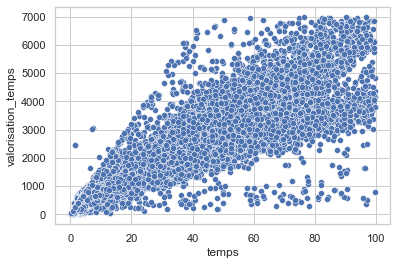

In [49]:
sns.scatterplot(data=df_sansoutliers[df_sansoutliers['temps'] < 100], x="temps", y="valorisation_temps")

In [48]:
df_sansoutliers[df_sansoutliers['temps'] > 15000]

,exercice,total_assistant,temps,valorisation_temps,com,jur,Formalités de rupture de contrat de travail,autres declarations fiscales,Formalités embauche,renseignements client,declarations tva,presentation des comptes annuels,travaux exceptionnels covd,Autres travaux exceptionnels,situation intermediaire,Secrétariat juridique,sas,sci
code_mission,,,,,,,,,,,,,,,,,,
ACOM2018009560800,2018-01-01,6.0,15071.52,6671.99,1,0,0,1,0,0,1,1,0,0,0,0,0,0


In [50]:
df_sansoutliers[df_sansoutliers['temps'] < 100].corr()

,total_assistant,temps,valorisation_temps,com,jur,Formalités de rupture de contrat de travail,autres declarations fiscales,Formalités embauche,renseignements client,declarations tva,presentation des comptes annuels,travaux exceptionnels covd,Autres travaux exceptionnels,situation intermediaire,Secrétariat juridique,sas,sci
total_assistant,1.000000,0.592463,0.563663,0.391324,-0.211829,0.127427,0.306853,0.061782,0.466183,0.322072,0.389682,0.214987,0.186678,0.034349,-0.220175,-0.008836,-0.083332
temps,0.592463,1.000000,0.923997,0.335153,-0.357056,0.236194,0.361695,0.110709,0.497207,0.370919,0.464461,0.307167,0.165398,0.112527,-0.383727,0.029212,-0.250857
valorisation_temps,0.563663,0.923997,1.000000,0.440310,-0.336604,0.117719,0.457724,0.006142,0.520152,0.420666,0.567639,0.315847,0.240308,0.152638,-0.352080,0.045381,-0.245464
com,0.391324,0.335153,0.440310,1.000000,-0.433613,-0.228505,0.619315,-0.290628,0.568076,0.540476,0.647481,0.135810,0.219640,0.065475,-0.454628,-0.091608,0.115204
jur,-0.211829,-0.357056,-0.336604,-0.433613,1.000000,-0.144688,-0.329726,-0.184271,-0.356561,-0.236405,-0.282341,-0.134275,-0.131469,-0.053882,0.751161,0.003789,0.127253
Formalités de rupture de contrat de travail,0.127427,0.236194,0.117719,-0.228505,-0.144688,1.000000,-0.173759,0.380820,0.021037,-0.124581,-0.148788,0.064395,-0.067477,-0.028395,-0.191904,0.020724,-0.124186
autres declarations fiscales,0.306853,0.361695,0.457724,0.619315,-0.329726,-0.173759,1.000000,-0.221082,0.474798,0.462008,0.592530,0.155564,0.214052,0.074519,-0.374735,-0.073515,-0.141042
Formalités embauche,0.061782,0.110709,0.006142,-0.290628,-0.184271,0.380820,-0.221082,1.000000,-0.062884,-0.158663,-0.189034,0.001921,-0.082064,-0.036163,-0.244200,0.044975,-0.157593
renseignements client,0.466183,0.497207,0.520152,0.568076,-0.356561,0.021037,0.474798,-0.062884,1.000000,0.390058,0.474106,0.231770,0.197904,0.058295,-0.413340,-0.037960,-0.092176
declarations tva,0.322072,0.370919,0.420666,0.540476,-0.236405,-0.124581,0.462008,-0.158663,0.390058,1.000000,0.457121,0.131759,0.155565,0.062075,-0.261326,-0.023153,-0.033241


## Machine learning sur les missions à moins de 100 heures

In [31]:
mccm_data_train_moins100 = df_sansoutliers[['total_assistant', 'temps', 'com', 'jur', 'Formalités de rupture de contrat de travail', 'autres declarations fiscales', 'Formalités embauche', 
                     'renseignements client', 'declarations tva','presentation des comptes annuels', 'travaux exceptionnels covd',
                     'Autres travaux exceptionnels', 'situation intermediaire','Secrétariat juridique', 'sas', 'sci']][df_sansoutliers['temps'] < 100]

mccm_target_train_moins100 = df_sansoutliers['valorisation_temps'][df_sansoutliers['temps'] < 100]

mccm_data_train_moins100, mccm_data_test_moins100, mccm_target_train_moins100, mccm_target_test_moins100 = train_test_split(mccm_data_train_moins100, mccm_target_train_moins100, test_size=20)

In [32]:
gbm.fit(mccm_data_train_moins100, mccm_target_train_moins100)

LGBMRegressor()

In [33]:
from sklearn.model_selection import cross_val_score

lgbm_scores = cross_val_score(gbm, mccm_data_train_moins100, mccm_target_train_moins100,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

lgbm_mae_scores = -lgbm_scores
display_scores(lgbm_mae_scores)

Scores: [179.36817548 170.54517242 173.41353236 172.65859896 174.67415368
 170.71395437 174.5052605  163.72813162 172.5587892  168.4436076 ]
Mean: 172.06093762033018
Standard deviation: 3.9403876185476134


In [56]:
opt.fit(mccm_data_train_moins100, mccm_target_train_moins100)

print("val. score: %s" % opt.best_score_)
print("best params: %s" % str(opt.best_params_))

C:\Users\tweet\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\tweet\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\tweet\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\tweet\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\tweet\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\tweet\

val. score: 0.9394329889652053
best params: OrderedDict([('boosting_type', 'gbdt'), ('max_depth', 20), ('n_estimators', 100)])


In [57]:
bayes_scores = cross_val_score(opt, mccm_data_train_moins100, mccm_target_train_moins100,
                             scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)

bayes_scores_mae_scores = -bayes_scores
display_scores(bayes_scores_mae_scores)

Scores: [159.26214328 182.8918878  177.58004314 173.09702749          nan
          nan 171.90891838 170.23612422 169.8781123  171.84462739]
Mean: nan
Standard deviation: nan


In [2]:
from sklearn.inspection import permutation_importance
r = permutation_importance(opt, mccm_data_train_moins100, mccm_target_train_moins100,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{feature_names[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

NameError: name 'opt' is not defined

In [41]:
gbm_ameliore = lgb.LGBMRegressor(boosting_type='gbdt', max_depth=20, n_estimators=100)

gbm_ameliore.fit(mccm_data_train_moins100, mccm_target_train_moins100)

LGBMRegressor(max_depth=20)

In [37]:
y_gbm_ameliore_pred = gbm_ameliore.predict(mccm_data_test_moins100)
y_gbm_ameliore_pred

array([ 258.425453  ,  367.24648765,  954.08818719,  632.09846166,
       3990.26308051, 1550.53807252, 1048.61079007, 3163.65764258,
       1186.36472782,  708.80861081, 4080.03864795,  342.01320311,
        680.89121128, 1892.3496484 , 1131.52531488,  570.97048806,
        334.44997829, 2047.50317908,  152.01118049,  236.28512534])

In [42]:
mccm_target_test_moins100

code_mission
AGE02017011109700     300.00
AGS02020013021900     354.26
ACOM2020011164800    1007.50
AGS02020012998900     665.50
ACOM2018009055900    5421.25
ACOM2020011054400    1431.13
ASOP2018011504600     799.00
ACOM2019010759100    2871.80
ACOM2019009798200    1106.26
ACOM2018010757700     582.25
ACOM2018009635400    4388.88
AJUR2018010645500     357.00
ACOM2017008275900     540.05
ACOM2020011340700    1659.25
ASOP2018011528300    1092.00
AGEP2018012047300     401.25
AGEJ2018011653300     217.00
ASOP2018011546600    1785.50
AJUR2018010722800     110.50
AJUR2017009725200     210.25
Name: valorisation_temps, dtype: float64

In [39]:
r2_score(mccm_target_test_moins100, y_gbm_ameliore_pred)

0.9347000786310303

In [40]:
mean_absolute_error(mccm_target_test_moins100, y_gbm_ameliore_pred)

189.6957711929061